In [1]:
import pandas as pd

In [2]:
dados = 'https://raw.githubusercontent.com/GSBorbely/TelecomX_parte2/refs/heads/main/dados.csv'
df = pd.read_csv(dados, sep=';')

# Remoção de Colunas irrelevantes


In [3]:
df_tratado = df.drop(['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService','customerID','account_PaperlessBilling'], axis=1)

In [4]:
df_tratado


,customer_SeniorCitizen,customer_tenure,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,...,account_PaymentMethod,account_Charges.Daily,account_Charges.Monthly,account_Charges.Total,Churn_binario,Customer_gender_binario,customer_partner_binario,customer_dependents_binario,customer_phoneService_binario,customer_paperless_binario
0,0,9,No,DSL,No,Yes,No,Yes,Yes,No,...,Mailed check,2.19,65.60,593.30,0.0,0,1,1,1,1
1,0,9,Yes,DSL,No,No,No,No,No,Yes,...,Mailed check,2.00,59.90,542.40,0.0,1,0,0,1,0
2,0,4,No,Fiber optic,No,No,Yes,No,No,No,...,Electronic check,2.46,73.90,280.85,1.0,1,0,0,1,1
3,1,13,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,...,Electronic check,3.27,98.00,1237.85,1.0,1,1,0,1,1
4,1,3,No,Fiber optic,No,No,No,Yes,Yes,No,...,Mailed check,2.80,83.90,267.40,1.0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,13,No,DSL,Yes,No,No,Yes,No,No,...,Mailed check,1.84,55.15,742.90,0.0,0,0,0,1,0
7263,0,22,Yes,Fiber optic,No,No,No,No,No,Yes,...,Electronic check,2.84,85.10,1873.70,1.0,1,1,0,1,1
7264,0,2,No,DSL,No,Yes,No,No,No,No,...,Mailed check,1.68,50.30,92.75,0.0,1,0,0,1,1
7265,0,67,No,DSL,Yes,No,Yes,Yes,No,Yes,...,Mailed check,2.26,67.85,4627.65,0.0,1,1,1,1,0


In [5]:
df_normalizado = df_tratado.copy()

# Encoding

In [6]:
df_normalizado.select_dtypes(include=['object', 'category']).columns

Index(['phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaymentMethod'],
      dtype='object')

In [7]:
colunas_categoricas = ['phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaymentMethod']

In [8]:
df_encoded = pd.get_dummies(df_normalizado, columns=colunas_categoricas, drop_first=True)
df_encoded

,customer_SeniorCitizen,customer_tenure,account_Charges.Daily,account_Charges.Monthly,account_Charges.Total,Churn_binario,Customer_gender_binario,customer_partner_binario,customer_dependents_binario,customer_phoneService_binario,...,internet_TechSupport_Yes,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,9,2.19,65.60,593.30,0.0,0,1,1,1,...,True,False,True,False,False,True,False,False,False,True
1,0,9,2.00,59.90,542.40,0.0,1,0,0,1,...,False,False,False,False,True,False,False,False,False,True
2,0,4,2.46,73.90,280.85,1.0,1,0,0,1,...,False,False,False,False,False,False,False,False,True,False
3,1,13,3.27,98.00,1237.85,1.0,1,1,0,1,...,False,False,True,False,True,False,False,False,True,False
4,1,3,2.80,83.90,267.40,1.0,0,1,0,1,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,13,1.84,55.15,742.90,0.0,0,0,0,1,...,True,False,False,False,False,True,False,False,False,True
7263,0,22,2.84,85.10,1873.70,1.0,1,1,0,1,...,False,False,False,False,True,False,False,False,True,False
7264,0,2,1.68,50.30,92.75,0.0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,True
7265,0,67,2.26,67.85,4627.65,0.0,1,1,1,1,...,True,False,False,False,True,False,True,False,False,True


# Verificação da Proporção de Evasão

In [9]:
contagem = df_normalizado['Churn_binario'].value_counts()


In [10]:
proporcao = df_normalizado['Churn_binario'].value_counts(normalize=True)


/tmp/ipython-input-775759307.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x='Status', y='Quantidade', data=df_plot, ax=axes[0], palette='Blues_d')
/tmp/ipython-input-775759307.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x='Status', y='Proporcao (%)', data=df_plot, ax=axes[1], palette='Greens_d')


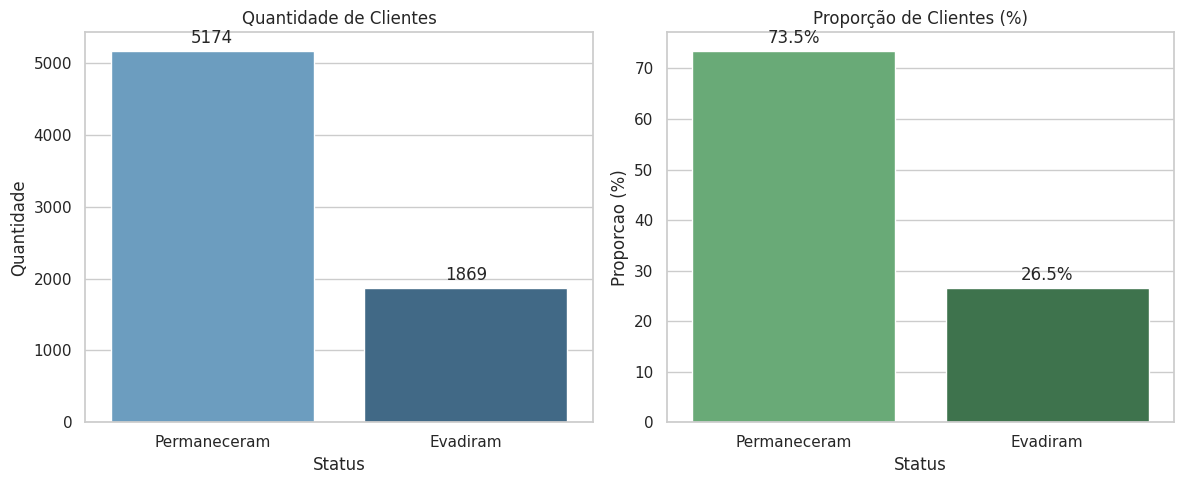

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

contagem = df_normalizado['Churn_binario'].value_counts().sort_index()

proporcao = df_normalizado['Churn_binario'].value_counts(normalize=True).sort_index()


df_plot = pd.DataFrame({
    'Status': ['Permaneceram', 'Evadiram'],
    'Quantidade': contagem.values,
    'Proporcao (%)': proporcao.values * 100
})


sns.set(style='whitegrid')


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bar1 = sns.barplot(x='Status', y='Quantidade', data=df_plot, ax=axes[0], palette='Blues_d')
axes[0].set_title('Quantidade de Clientes')

for container in bar1.containers:
    bar1.bar_label(container, fmt='%d', padding=3)


bar2 = sns.barplot(x='Status', y='Proporcao (%)', data=df_plot, ax=axes[1], palette='Greens_d')
axes[1].set_title('Proporção de Clientes (%)')

for container in bar2.containers:
    bar2.bar_label(container, fmt='%.1f%%', padding=3)


plt.tight_layout()
plt.show()


In [12]:
print("Contagem:")
print(contagem)

print("\nProporção:")
print(proporcao)

Contagem:
Churn_binario
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporção:
Churn_binario
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


**Contagem de Clientes:**

Clientes ativos (0.0): 5.174

Clientes que evadiram (1.0): 1.869

**Proporção:**

73,46% dos clientes permaneceram.

26,54% dos clientes evadiram.

# Normalização ou Padronização

In [13]:
df_escala = df_encoded.copy()

Usando o MinMaxScaler para padronizar os dados (Min de 0 e máx de 1 para todas as colunas)

In [14]:
from sklearn.preprocessing import MinMaxScaler

X = df_escala.drop('Churn_binario', axis=1)
y = df_escala['Churn_binario']

X_numerico = X.select_dtypes(include=['int64', 'float64'])

scaler = MinMaxScaler()
X_normalizado = pd.DataFrame(scaler.fit_transform(X_numerico), columns=X_numerico.columns)

X_final = pd.concat([X_normalizado], axis=1)

df_escala_final = pd.concat([X_final, y.reset_index(drop=True)], axis=1)
df_escala_final.head()

,customer_SeniorCitizen,customer_tenure,account_Charges.Daily,account_Charges.Monthly,account_Charges.Total,Customer_gender_binario,customer_partner_binario,customer_dependents_binario,customer_phoneService_binario,customer_paperless_binario,Churn_binario
0,0.0,0.125000,0.471642,0.471144,0.066294,0.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.125000,0.414925,0.414428,0.060420,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.055556,0.552239,0.553731,0.030239,1.0,0.0,0.0,1.0,1.0,1.0
3,1.0,0.180556,0.794030,0.793532,0.140670,1.0,1.0,0.0,1.0,1.0,1.0
4,1.0,0.041667,0.653731,0.653234,0.028687,0.0,1.0,0.0,1.0,1.0,1.0


In [15]:
df_escala_final.describe().round(2)

,customer_SeniorCitizen,customer_tenure,account_Charges.Daily,account_Charges.Monthly,account_Charges.Total,Customer_gender_binario,customer_partner_binario,customer_dependents_binario,customer_phoneService_binario,customer_paperless_binario,Churn_binario
count,7267.00,7267.00,7267.00,7267.00,7256.00,7267.00,7267.00,7267.00,7267.0,7267.00,7043.00
mean,0.16,0.45,0.46,0.46,0.26,0.51,0.48,0.30,0.9,0.59,0.27
std,0.37,0.34,0.30,0.30,0.26,0.50,0.50,0.46,0.3,0.49,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,0.00,0.12,0.17,0.17,0.04,0.00,0.00,0.00,1.0,0.00,0.00
50%,0.00,0.40,0.52,0.52,0.16,1.00,0.00,0.00,1.0,1.00,0.00
75%,0.00,0.76,0.71,0.71,0.43,1.00,1.00,1.00,1.0,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00


# Análise de Correlação

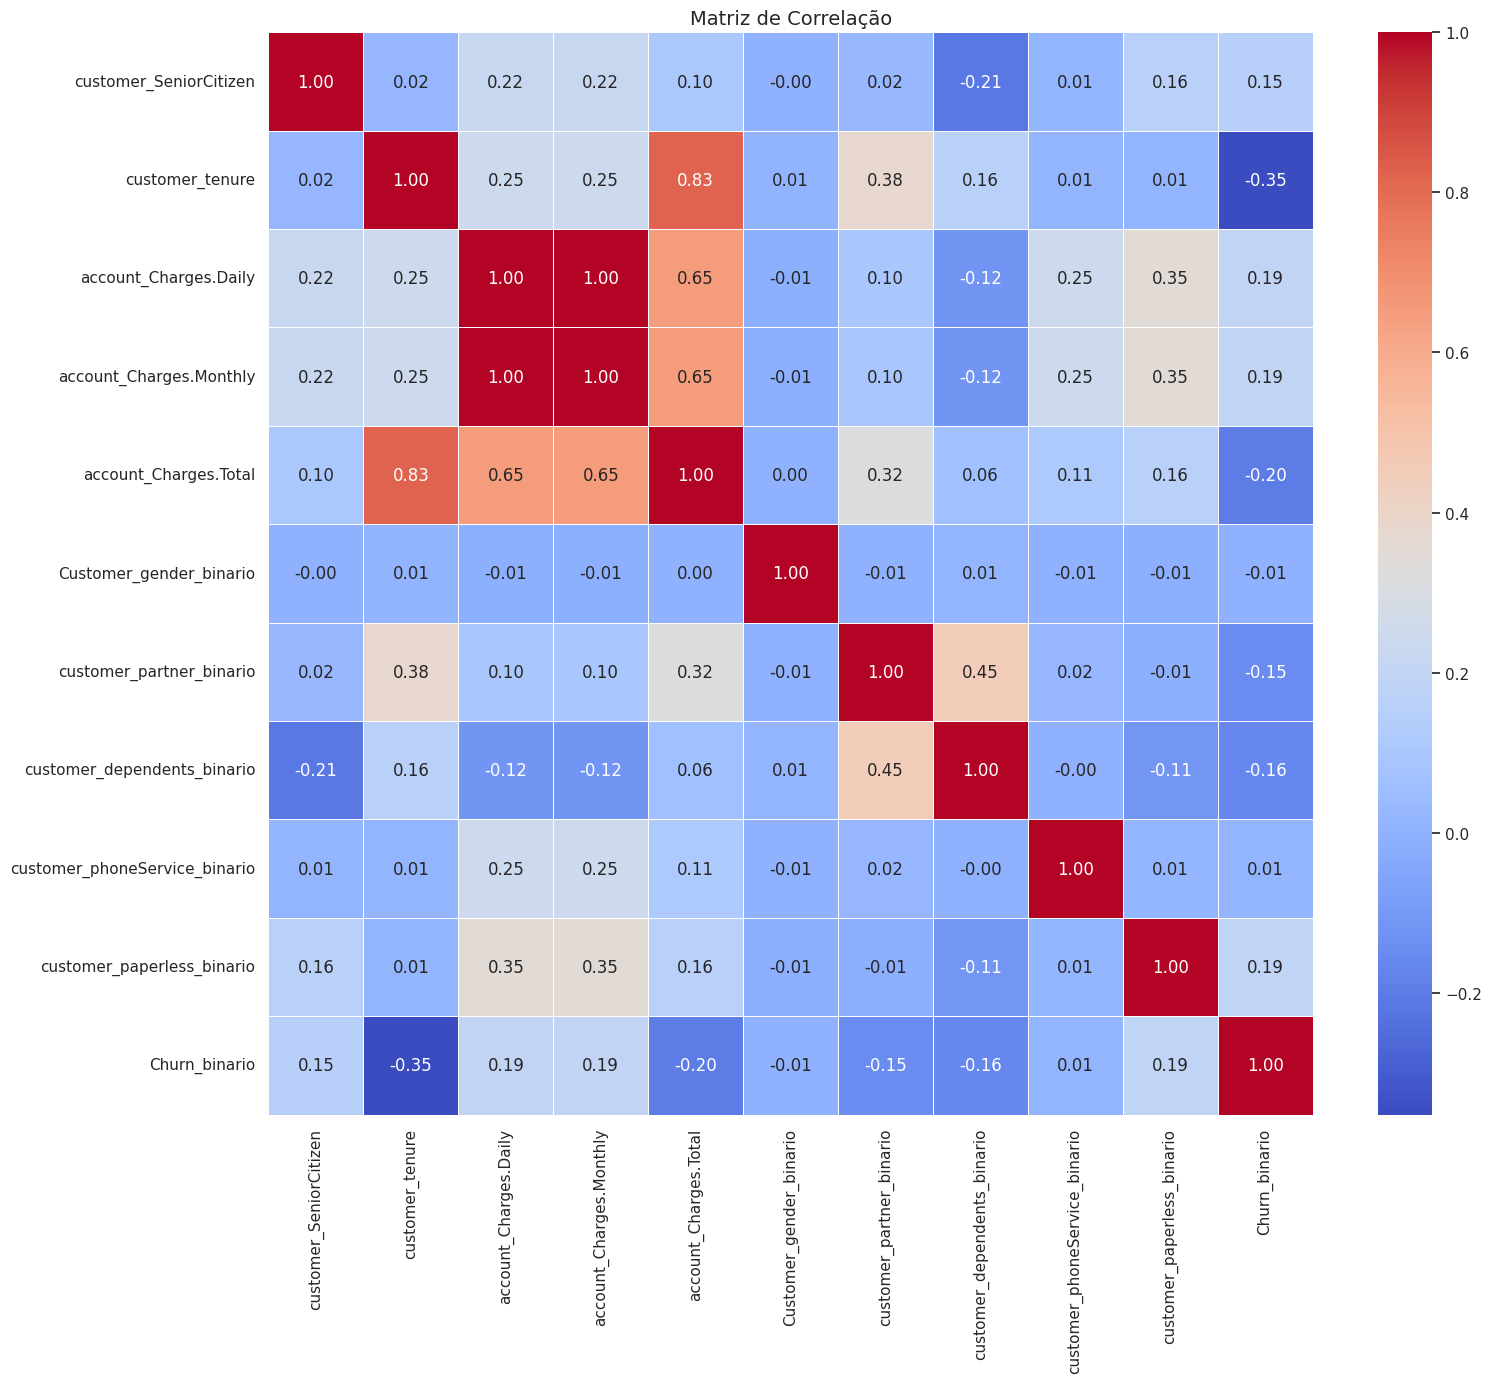

In [16]:

correlacao_total = df_escala_final.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlacao_total, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlação', fontsize=14)
plt.tight_layout()
plt.show()


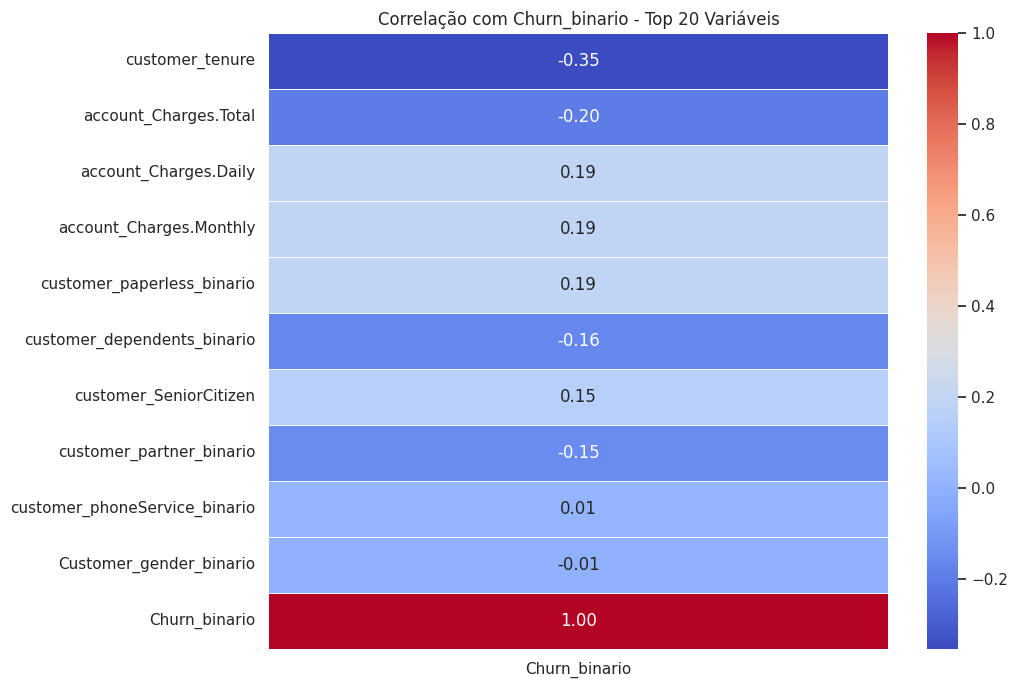

In [17]:

target_corr = correlacao_total['Churn_binario'].drop('Churn_binario').sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(df_escala_final[target_corr.index[:20].tolist() + ['Churn_binario']].corr()[['Churn_binario']],
            cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlação com Churn_binario - Top 20 Variáveis')
plt.show()


 Principais destaques do gráfico:

customer_tenure	-0.35	Clientes antigos têm menor chance de sair

account_Charges.Total	-0.20	Gastos totais maiores tendem a estar associados à permanência

account_Charges.Daily/Monthly	+0.19	Leve correlação positiva com churn

customer_paperless_binario	+0.19	Clientes com fatura digital tendem a sair mais

customer_dependents_binario	-0.16	Clientes com dependentes tendem a permanecer

customer_SeniorCitizen	+0.15	Idosos têm leve tendência a evadir

customer_partner_binario	-0.15	Quem tem parceiro tende a permanecer

# Análises Direcionadas

/tmp/ipython-input-982779515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Churn_binario'] = df_plot['Churn_binario'].astype(str)
/tmp/ipython-input-982779515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


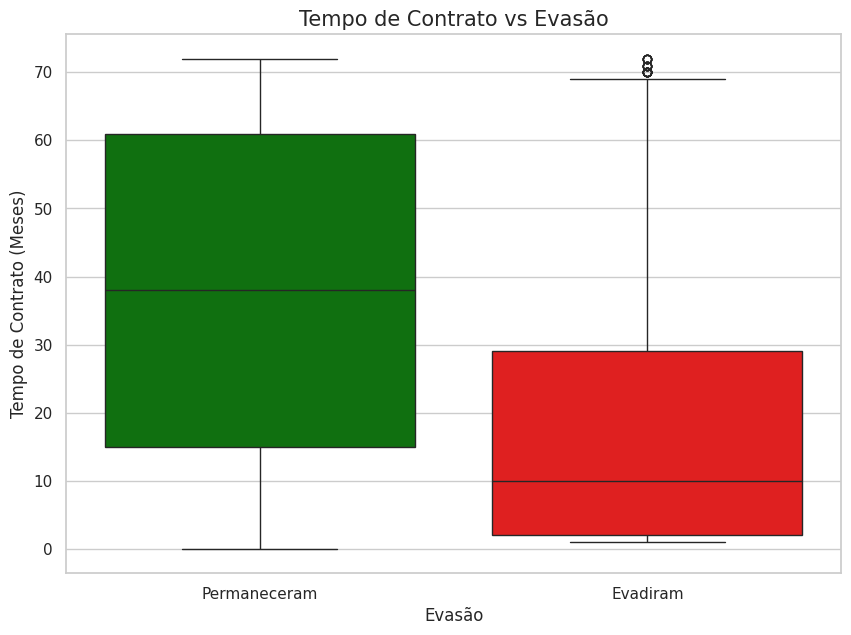

In [18]:
df_plot = df_encoded[df_encoded['Churn_binario'].notna()]
df_plot['Churn_binario'] = df_plot['Churn_binario'].astype(str)
palette = {'0.0': 'green', '1.0': 'red'}

plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Churn_binario',
    y='customer_tenure',
    data=df_plot,
    palette=palette
)

plt.title('Tempo de Contrato vs Evasão', fontsize=15)
plt.xlabel('Evasão')
plt.ylabel('Tempo de Contrato (Meses)')
plt.xticks([0, 1], ['Permaneceram', 'Evadiram'])
plt.show()


/tmp/ipython-input-896421985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Churn_binario'] = df_plot['Churn_binario'].astype(str)
/tmp/ipython-input-896421985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


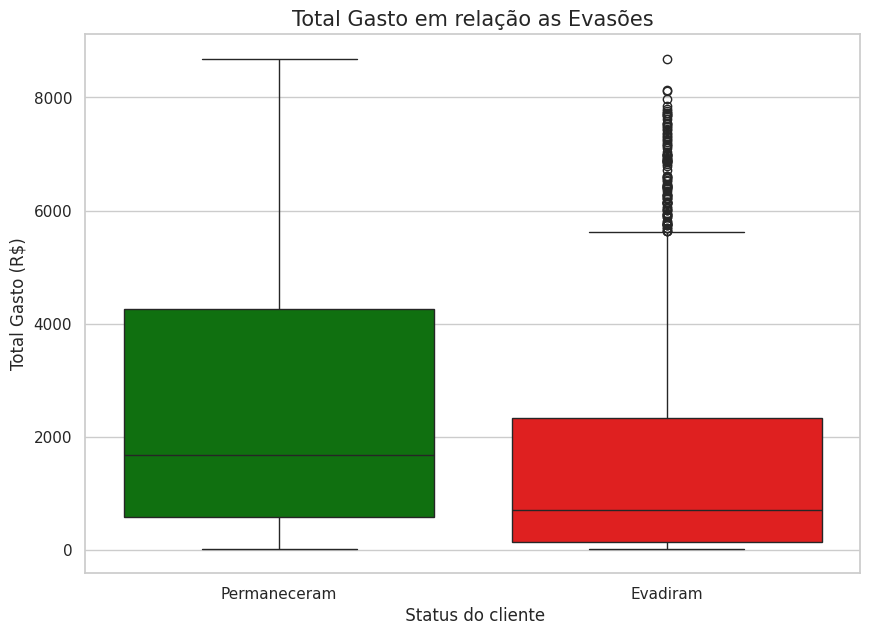

In [19]:
df_plot = df_encoded[df_encoded['Churn_binario'].notna()]
df_plot['Churn_binario'] = df_plot['Churn_binario'].astype(str)
palette = {'0.0': 'green', '1.0': 'red'}

plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Churn_binario',
    y='account_Charges.Total',
    data=df_plot,
    palette=palette
)

plt.title('Total Gasto em relação as Evasões', fontsize=15)
plt.xlabel(' Status do cliente')
plt.ylabel('Total Gasto (R$)')
plt.xticks([0, 1], ['Permaneceram', 'Evadiram'])
plt.show()


# Separação de Dados

In [20]:
from sklearn.model_selection import train_test_split
df_tratado = df_escala_final[df_escala_final['Churn_binario'].notna()]
df_tratado = df_tratado.dropna()
X = df_tratado.drop(columns=['Churn_binario'])
y = df_tratado['Churn_binario']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Criação de Modelos

# Regressão Logistica

Utlizei este modelo de inicio pois tratasse do modelo mais clássico e mais recomendado neste caso. Funciona perfeitamente como referência inicial e os dados precisam ser tratados, pois é sensivel a dados não normalizados.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[1413  136]
 [ 292  269]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1549
         1.0       0.66      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110



# Avaliação do modelo - Regressão Logistica

1413 clientes foram corretamente classificados como não evadidos (verdadeiros negativos).

269 clientes foram corretamente identificados como evadidos (verdadeiros positivos).

136 clientes que permaneceram foram classificados como se tivessem evadido (falsos positivos).

292 clientes que evadiram foram classificados como se tivessem permanecido (falsos negativos).

Precisão da classe 1 (evadidos): 66% dos clientes que o modelo previu como evadidos realmente evadiram.

Recall da classe 1: o modelo identificou corretamente apenas 48% dos clientes que realmente evadiram (mais da metade passaram despercebidos).

Acurácia geral: 80% — ou seja, 8 em cada 10 clientes foram classificados corretamente.

F1-score da classe 1 (churn): apenas 0.56 — o modelo ainda está com dificuldade em capturar corretamente quem vai evadir.


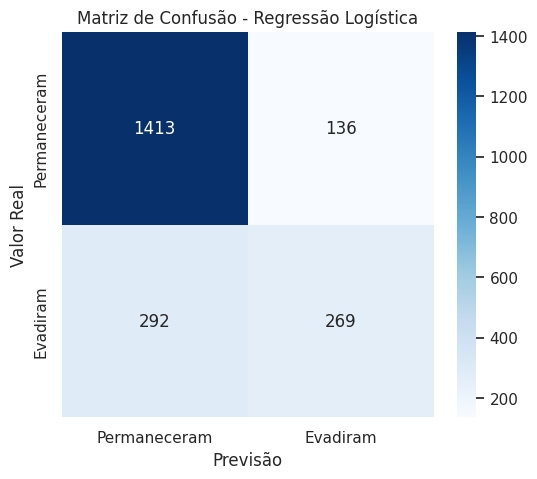

In [22]:
cm = confusion_matrix(y_test, y_pred)


labels = ['Permaneceram', 'Evadiram']


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

Regressão Logistica -

**Neste caso, o modelo funciona bem em apresentar os clientes que não evadiram, porém ainda tem dificuldade em demonstrar os cancelaram o serviço.**

# Segundo modelo - Random Forest

Escolhi o random forest como um segundo modelo, sendo um modelo mais flexivel em relação a normalização dos dados. Comparado ao primeiro modelo, o Random Forest apresenta padrões mais complexos, sendo interessante para identificar padrões relevantes para o resultado.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X = df_tratado.drop(columns=['Churn_binario'])
y = df_tratado['Churn_binario']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("Matriz de Confusão - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Matriz de Confusão - Random Forest:
[[1357  197]
 [ 281  275]]

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1554
         1.0       0.58      0.49      0.54       556

    accuracy                           0.77      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.77      0.77      2110



# Avaliação do modelo - Random Forest

Verdadeiros Negativos (TN): 1357
Clientes que não evadiram e foram corretamente classificados como tal.

Falsos Positivos (FP): 197
Clientes que não evadiram, mas o modelo previu que evadiriam.

Falsos Negativos (FN): 281
Clientes que evadiram, mas o modelo previu que não evadiriam.

Verdadeiros Positivos (TP): 275
Clientes que evadiram e foram corretamente identificados.

Precisão da classe 1 (evadidos): Quando o modelo prevê que um cliente vai evadir, ele acerta 58% das vezes.

Recall da classe 1: O modelo identificou corretamente 49% dos clientes que realmente evadiram.

F1-score da classe 1: 0.54 — mostra que o desempenho nessa classe ainda é moderado.

Acurácia geral: 77% — o modelo acerta 77 a cada 100 clientes no total.

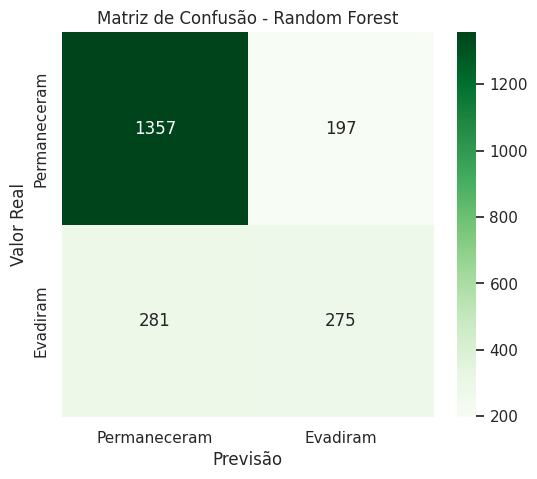

In [24]:
cm = confusion_matrix(y_test, y_pred_rf)
labels = ['Permaneceram', 'Evadiram']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()


Modelo Random Forest -
**O modelo funciona bem para demonstrar os que clientes que permanecem com alta precisão e recall dos que não evadiram. Por outro lado, tem dificuldade em demonstrar os que vão evadir, demonstrando menos da metade dos corretamente identificados. Comparado ao primeiro modelo, o resultado é parecido porém levemente pior em comparação com o recall dos que cancelaram o serviço. **

# Underfitting ou Overfitting

Regressão Logistica

In [25]:
from sklearn.metrics import classification_report, accuracy_score

y_train_pred = model.predict(X_train_scaled)
print("Treinamento - Regressão Logística")
print("Acurácia:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

print("\nTeste - Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Treinamento - Regressão Logística
Acurácia: 0.6418122714343762
              precision    recall  f1-score   support

         0.0       0.73      0.80      0.77      3609
         1.0       0.27      0.19      0.22      1313

    accuracy                           0.64      4922
   macro avg       0.50      0.50      0.50      4922
weighted avg       0.61      0.64      0.62      4922


Teste - Regressão Logística
Acurácia: 0.6459715639810426
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77      1554
         1.0       0.26      0.19      0.22       556

    accuracy                           0.65      2110
   macro avg       0.50      0.50      0.50      2110
weighted avg       0.61      0.65      0.63      2110



**Acurácia parecida entre treino (73,5%) e teste (72,7%), o que indica pouco ou quase nenhum Overfitiing**

Random Forest

In [26]:
from sklearn.metrics import classification_report, accuracy_score


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_train_pred_rf = rf_model.predict(X_train)
print("Treinamento - Random Forest")
print("Acurácia:", accuracy_score(y_train, y_train_pred_rf))
print(classification_report(y_train, y_train_pred_rf))


y_pred_rf = rf_model.predict(X_test)
print("\nTeste - Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Treinamento - Random Forest
Acurácia: 0.9973587972368956
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3609
         1.0       1.00      0.99      1.00      1313

    accuracy                           1.00      4922
   macro avg       1.00      1.00      1.00      4922
weighted avg       1.00      1.00      1.00      4922


Teste - Random Forest
Acurácia: 0.7734597156398104
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1554
         1.0       0.58      0.49      0.54       556

    accuracy                           0.77      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.77      0.77      2110



Neste caso o modelo aprendeu perfeitamente os dados de treino, apresentando quase 100% de acurácia, indicando Overfitting. Para reduzi-lo, é recomendado o uso do parâmetro max-depth para limitar a profundida máxima das árvores, e o Min-samples_split para limitar o minimo de amostras para dividir um nó, e/ou o Min-samples_leaf

In [27]:

rf_model = RandomForestClassifier(min_samples_split=10, min_samples_leaf=5,max_depth=10,random_state=42)
rf_model.fit(X_train, y_train)


y_train_pred_rf = rf_model.predict(X_train)
print("Treinamento - Random Forest")
print("Acurácia:", accuracy_score(y_train, y_train_pred_rf))
print(classification_report(y_train, y_train_pred_rf))


y_pred_rf = rf_model.predict(X_test)
print("\nTeste - Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Treinamento - Random Forest
Acurácia: 0.8524989841527835
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90      3609
         1.0       0.80      0.59      0.68      1313

    accuracy                           0.85      4922
   macro avg       0.83      0.77      0.79      4922
weighted avg       0.85      0.85      0.84      4922


Teste - Random Forest
Acurácia: 0.781042654028436
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1554
         1.0       0.60      0.49      0.54       556

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



Após as mudanças, o modelo apresentou uma melhora com a redução da acurácia dos dados de treino (85,5%), ou seja, o modelo parou de decorar os dados.

# Análise de Importância das Variáveis

In [28]:
import numpy as np
feature_names = df_tratado.drop(columns=['Churn_binario']).columns

coefs = model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': coefs,
    'Importância Absoluta': np.abs(coefs)
})

coef_df = coef_df.sort_values(by='Importância Absoluta', ascending=False).reset_index(drop=True)

print(coef_df)

                         Feature  Coeficiente  Importância Absoluta
0                customer_tenure    -1.651552              1.651552
1          account_Charges.Daily     0.444643              0.444643
2        account_Charges.Monthly     0.437903              0.437903
3          account_Charges.Total     0.348810              0.348810
4     customer_paperless_binario     0.267517              0.267517
5  customer_phoneService_binario    -0.225933              0.225933
6         customer_SeniorCitizen     0.193726              0.193726
7    customer_dependents_binario    -0.102058              0.102058
8       customer_partner_binario    -0.034436              0.034436
9        Customer_gender_binario    -0.006181              0.006181


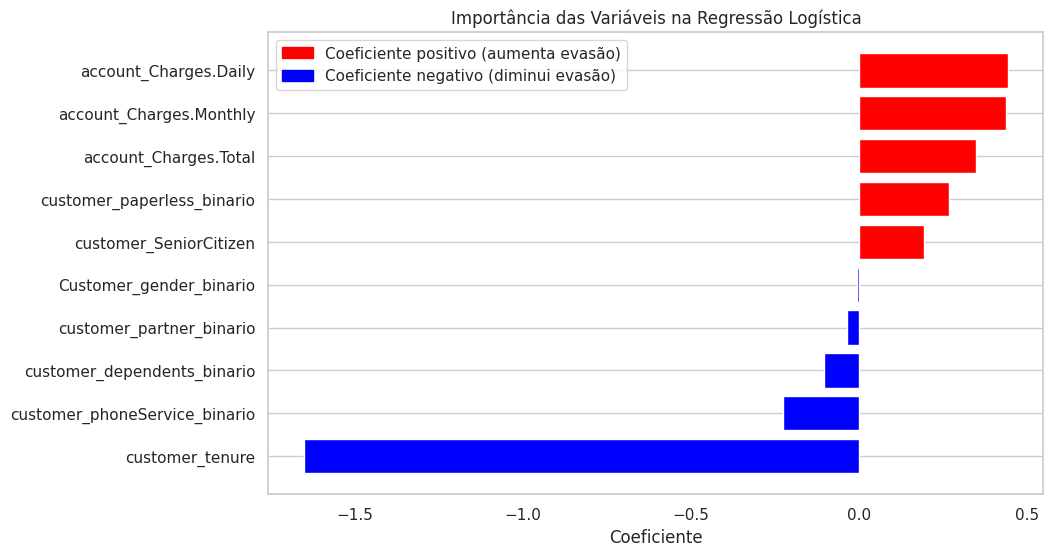

In [29]:
coef_df_sorted = coef_df.sort_values(by='Coeficiente')

colors = ['red' if c > 0 else 'blue' for c in coef_df_sorted['Coeficiente']]

plt.figure(figsize=(10,6))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coeficiente'], color=colors)
plt.xlabel('Coeficiente')
plt.title('Importância das Variáveis na Regressão Logística')
plt.grid(axis='x')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Coeficiente positivo (aumenta evasão)')
blue_patch = mpatches.Patch(color='blue', label='Coeficiente negativo (diminui evasão)')
plt.legend(handles=[red_patch, blue_patch])

plt.show()



Na Regressão Logistica quanto maior o coeficiente, maior a chance de evasão

# Análise - Random Forest

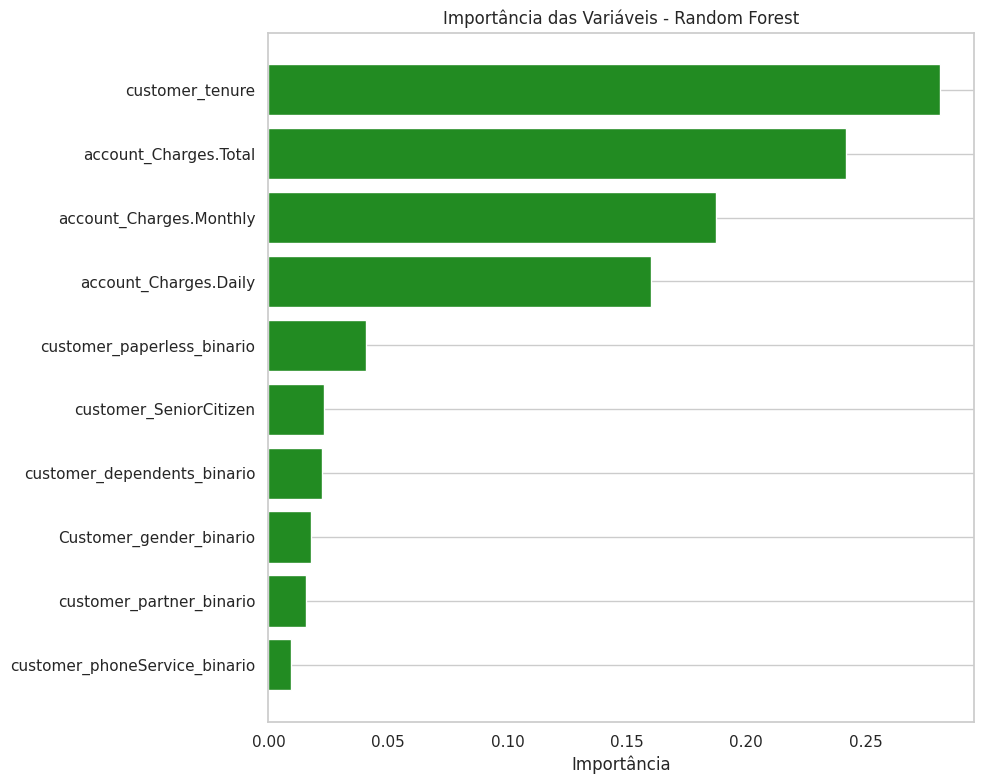

In [30]:

importancias = rf_model.feature_importances_


importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importância': importancias
})

importancia_df = importancia_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importancia_df['Feature'], importancia_df['Importância'], color='forestgreen')
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Random Forest')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


No Random Forest, quanto maior a variável mais relevância ela tem em relação as evasões

# Conclusão

Após análise de todos os modelos e a combinação da correlação dos dados ficou claro os principais motivos das evasões que vem ocorrendo na Telecom X.


1.   **Tempo de contrato (Customer Tenure)** - Um dos principais motivos de evasões dos clientes, tendo destaque nas duas análises dos dois modelos apresentados. Clientes com contratos mais curtos tendem a cancelar mais o serviço, principalmente os que possuem menos de 30 meses de adesão ao serviço. Neste caso o principal objetivo da Telecom deve ser o incentivo ao maior tempo de adesão logo no inicio do contrato, com preços que sejam atrativos nos tipos de contrato mais longos. Desta forma, haverá um grande diminuição nas evasões sendo que o este tipo de contrato apresenta uma maior porcentagem de retenção de clientes. A estratégia de marketing deve ser pontual, apresentando claramente as vantagens de se obter um contrato mais longo.
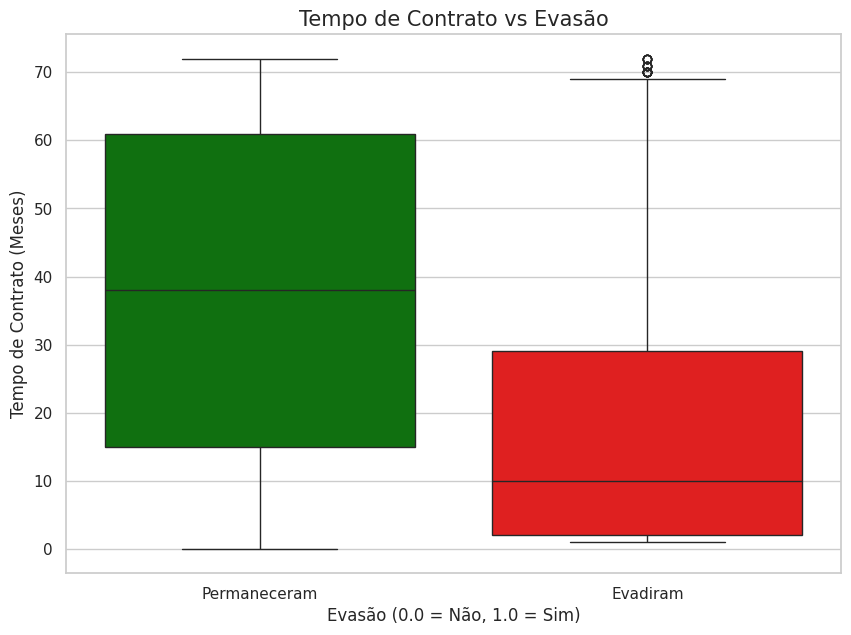


2.   **Tipo do Contrato (Daily, Monthly e Total) ** - Os clientes que pagam o serviço por dia e por mês são mais propensos a cancelar o serviço, relacionando-se com o valor cobrado que é a principal influência. Recomenda-se o estimulo a uma contratação de serviço anual, que apresenta uma maior retenção de clientes em relação aos outros tipos de contrato. As mensalidades mensais merecem uma grande atenção, e exige atenção em relação ao preço cobrado sendo necessário um reajuste no preço, e descontos que sejam mais atrativos aos clientes.


3. **Cobrança Eletrônica por cheque** - Outro fator de grande importância. A análise demonstra que grande parte dos que aderem a cobrança eletrônica tendem a cancelar o serviço mais frequentemente. Uma alternativa essencial para diminuir estas evasões é haver uma atenção maior em relação ao preço das faturas, aplicando pesquisas de satisfação relacionadas a este ponto e quais exatamentes são as insatisfações dos clientes. Outros tipos de cobrança devem ser recomendadas e incentivadas através de publicidade. A praticidade em um ponto tão importante como o pagamento das faturas deve ser prioridade, recomendando-se alternativas ao cheque eletrônico, como o pagamento por PIX, Cartão de Crédito,  Cartão de Débito ou Débito automático.







